In [2]:
""" 

DESCRIPTION

1. Plot showing histogram of exposures for each regions.

"""

import numpy as np
import netCDF4
import glob
import xarray as xr
import matplotlib.pyplot as plt

In [11]:
# Define path
path = '/Users/jryan4/Dropbox (University of Oregon)/research/snowfall/data/'

# Define save path
savepath = '/Users/jryan4/Dropbox (University of Oregon)/research/snowfall/figures/'

# Define exposure files
expo_files = sorted(glob.glob(path + 'modis_exposure_v2/*.nc'))

# Read data
index_data = xr.open_dataset(path + 'masks/index_main.nc', engine='netcdf4')

# Define maximum snowline
snowline_file = netCDF4.Dataset(path + 'masks/monthly_bare_ice_2012.nc')
snowline = snowline_file.variables['bare_ice'][1, :, :].filled(np.nan)
max_snowline = (snowline > 0.1)

# Define indices
index = list(zip(index_data['index_x'].values, index_data['index_y'].values))

# Define regions
regions = np.arange(1, 9)

# Define number of years
years = np.arange(2001, 2022, 1)

In [24]:
region = 6
i =13

In [12]:
mean_exposure = []

for region in regions:
      
    region_exposure = []
    for i in range(len(years)):
        
        # Import data
        expo = xr.open_dataset(expo_files[i])

        # Mask ablation zone
        abl_expo = expo['first_55'].values[max_snowline].astype(float)
        abl_expo[abl_expo == 0] = np.nan
        abl_expo[abl_expo < 151] = np.nan

        region_mask = index_data['region'].values == region
        region_exposure.append(np.nanmedian(abl_expo[region_mask]))
        
    mean_exposure.append(region_exposure)

In [25]:
# Import data
expo = xr.open_dataset(expo_files[i])

# Mask ablation zone
abl_expo = expo['first_55'].values[max_snowline].astype(float)
abl_expo[abl_expo == 0] = np.nan
abl_expo[abl_expo < 151] = np.nan

region_mask = index_data['region'].values == region

In [15]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(7, 5), layout='constrained')

ax1.hist(mean_exposure)

for ax in [ax1, ax3]:
    ax.set_ylabel('Albedo (unitless)', fontsize=14)
    
for ax in [ax3, ax4]:
    ax.set_xlabel('Time (Day of year)', fontsize=14)

for ax in [ax1, ax2, ax3, ax4]:
    ax.grid(ls='dashed', lw=1, zorder=1)
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.set_ylim(0, 100)
    ax.set_xlim(150, 275)

ax1.text(0.03, 0.85, "a", fontsize=20, transform=ax1.transAxes)
ax2.text(0.03, 0.85, "b", fontsize=20, transform=ax2.transAxes)
ax3.text(0.03, 0.85, "c", fontsize=20, transform=ax3.transAxes)
ax4.text(0.03, 0.85, "d", fontsize=20, transform=ax4.transAxes)

(35133,)

(array([1.476e+03, 7.890e+02, 5.490e+02, 1.926e+03, 5.830e+02, 1.017e+03,
        4.210e+02, 1.589e+03, 3.911e+03, 2.434e+03, 1.575e+03, 4.170e+02,
        3.620e+02, 1.250e+02, 5.700e+01, 1.520e+02, 1.180e+02, 1.372e+03,
        9.440e+02, 3.044e+03, 4.963e+03, 1.805e+03, 3.960e+02, 6.320e+02,
        3.210e+02, 4.590e+02, 1.481e+03, 2.600e+03, 1.363e+03, 1.185e+03,
        1.425e+03, 4.480e+02, 1.270e+02, 6.300e+01, 2.000e+01, 3.500e+01,
        3.600e+01, 3.900e+01, 7.000e+01, 2.530e+02, 8.290e+02, 3.290e+02,
        9.300e+01, 7.200e+01, 7.600e+01, 8.700e+01, 3.800e+01, 2.900e+01,
        2.000e+01, 1.000e+00]),
 array([152. , 153.8, 155.6, 157.4, 159.2, 161. , 162.8, 164.6, 166.4,
        168.2, 170. , 171.8, 173.6, 175.4, 177.2, 179. , 180.8, 182.6,
        184.4, 186.2, 188. , 189.8, 191.6, 193.4, 195.2, 197. , 198.8,
        200.6, 202.4, 204.2, 206. , 207.8, 209.6, 211.4, 213.2, 215. ,
        216.8, 218.6, 220.4, 222.2, 224. , 225.8, 227.6, 229.4, 231.2,
        233. , 234.8,

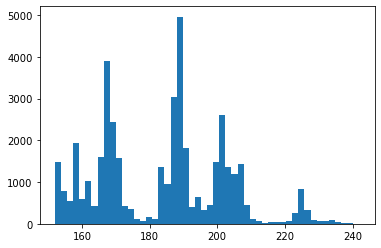

In [33]:
plt.hist(abl_expo[region_mask], bins=50)

In [34]:
np.nanmedian(abl_expo[region_mask])

187.0

In [22]:
i

20